In [1]:
import sys
sys.path.append('/public/src')
from factor_evaluation_server import FactorEvaluation,DataService # type: ignore
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas_ta as ta

In [2]:
ds=DataService()
df=ds['ETHUSDT_15m_2020_2025']['2021-10-01':]

In [3]:
evaluator=FactorEvaluation(df=df,future_return_periods=10)

# 定义因子！

In [4]:
def smart_money_sumd(df, window=60):
    """
    改进2：融合主力资金流向
    金融逻辑：跟随聪明钱(taker buy)的动向比跟随整体成交量更有效
    改进点：使用taker buy volume代替总成交量，识别主力动向
    """
    close = df['close'] 
    price_diff = close.diff()
    
    taker_ratio = df['taker_buy_volume'] / df['volume'].replace(0, 1e-12)
    
    # 主力资金方向加权的价格变动
    gain = (price_diff * taker_ratio).where(price_diff > 0, 0)
    # 当价格上涨时，主力资金的买入量对价格上涨的贡献
    loss = (-price_diff * (1 - taker_ratio)).where(price_diff < 0, 0)
    # 当价格下跌时，主力资金的卖出量对价格下跌的贡献
    
    sum_gain = gain.rolling(window).sum()
    sum_loss = loss.rolling(window).sum()
    
    # 计算总绝对变化
    sum_abs = (sum_gain + sum_loss) + 1e-12
    
    factor = (sum_gain - sum_loss) / sum_abs
    
    return factor

# 因子测试

In [5]:
evaluator.set_factor(
    factor_func=smart_money_sumd,
    factor_name='smart_money_sumd'
)


📊 单币种 (single) 详细评估结果:
--------------------------------------------------
🔗 相关性分析:
   IC (Pearson): 0.019685
   Rank_IC (Spearman): -0.024106
📊 信息比率:
   IR: 0.517850
   有效分组数: 10
📊 因子分布:
📋 数据概况:
   数据长度: 130881
   因子列: smart_money_sumd
   收益率列: future_return
   未来收益周期: 10
--------------------------------------------------

🖼️  单币种 (single) 图片展示:
----------------------------------------
📊 显示分组分析图...


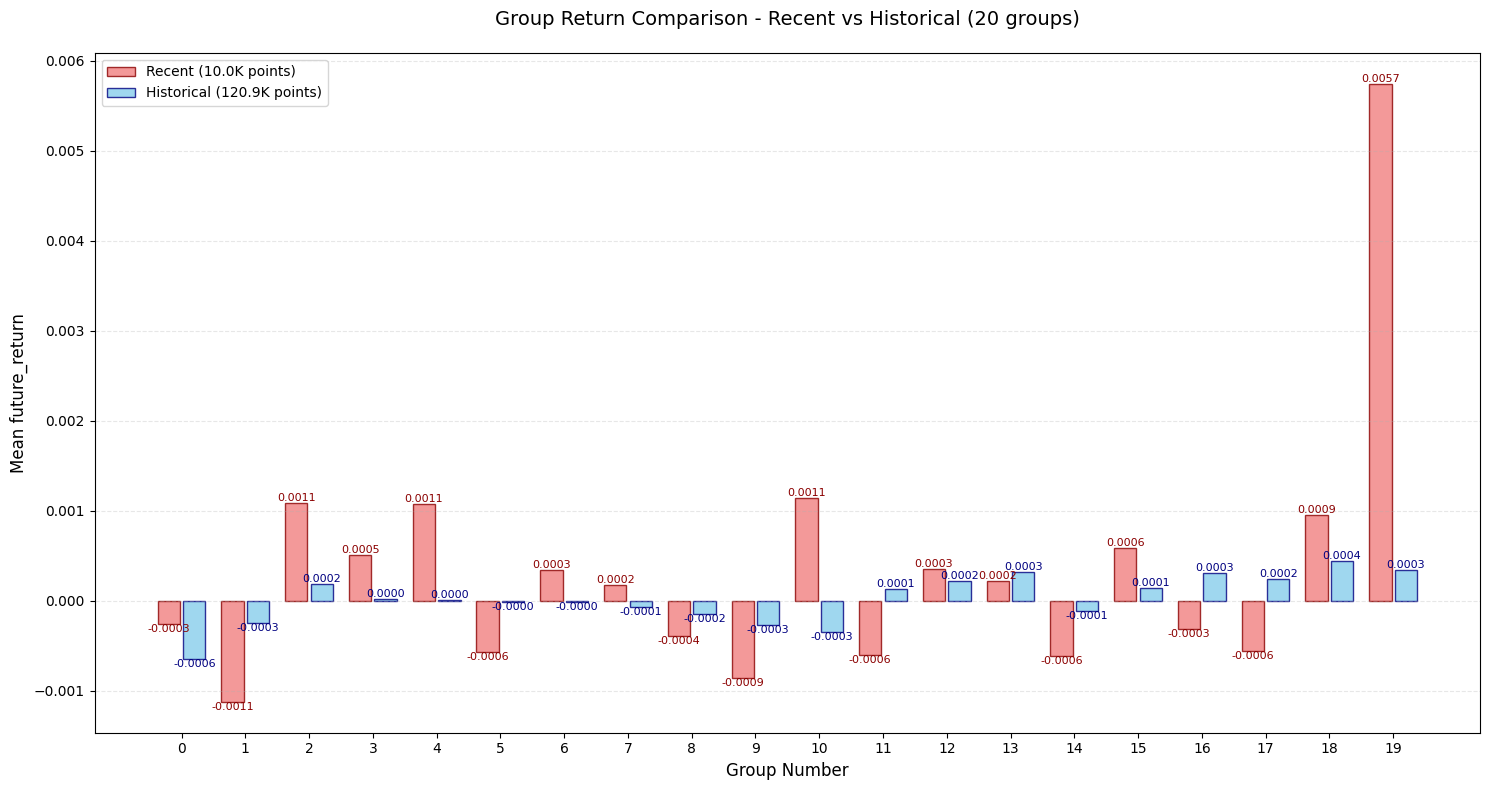

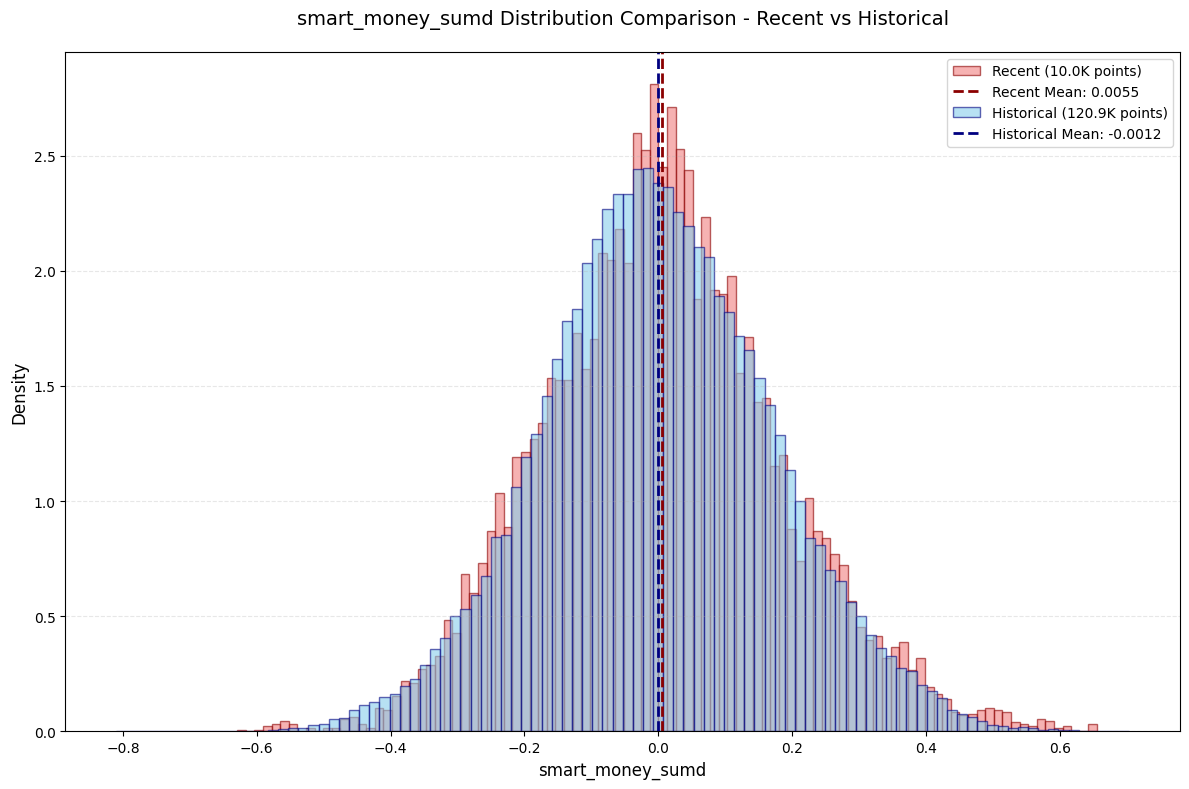

📈 显示因子分布图...
✅ 已显示 2 个图片
----------------------------------------


In [6]:
result=evaluator.run_full_evaluation(run_stationarity_test=False)

In [7]:
print(result)

{'correlation_analysis': {'IC': 0.0196850880184341, 'Rank_IC': -0.024105848143472584}, 'information_ratio': {'IR': 0.517849567723367, 'group_correlations': [0.011785290904977142, -0.007068469519140301, -0.00400891800850024, 0.0038027950501450525, -0.007251146768169838, 0.01376708447640858, 0.002562144215859175, 0.017070796115041666, -0.0013404418407954551, 0.02196020108170345], 'n_groups': 10}, 'group_analysis': {'group_stats':        val_min  val_max  val_mean  return_mean  return_std  count
group                                                            
0      -0.8104  -0.2821   -0.3548      -0.0006      0.0167   6545
1      -0.2821  -0.2163   -0.2459      -0.0003      0.0135   6544
2      -0.2163  -0.1745   -0.1945       0.0002      0.0127   6544
3      -0.1745  -0.1423   -0.1578       0.0001      0.0118   6544
4      -0.1423  -0.1143   -0.1281       0.0001      0.0115   6544
5      -0.1143  -0.0897   -0.1018      -0.0001      0.0112   6544
6      -0.0897  -0.0673   -0.0784       